We can start by importing our favourite package: ``elk``!

In [1]:
import elk
import numpy as np

%config InlineBackend.figure_format = "retina" # Not required, only applicable for Jupyter Notebooks

## Lightcurve Setup

Now let's do a simple ensemble light curve fit to NGC~129

We just want a single light curve, and we don't care which sector it is from, so we will use the `just_one_lc` command

In [2]:
c = elk.ensemble.EnsembleLC(identifier='NGC 419',
                            location='23.58271, +61.1236',
                            radius=.046,
                            cluster_age=7.75,
                            cutout_size=99,
                            just_one_lc=True,
                            verbose=True)

In [3]:
c.create_output_table()

NGC 419 has 4 observations
Starting Quality Tests for Observation: 0


100%|███████████████████████| 9801/9801 [13:30<00:00, 12.09it/s]


  Passed Quality Tests 
Found a lightcurve that passed quality tests - exiting since `self.just_one_lc=True`


## Plotting the lightcurve itself

Let's quickly grab the 3rd light curve since that sector is usually looking lovely this time of year

In [4]:
lc = c.lcs[0]

The plotting of the light curve itself is rather straightforward!

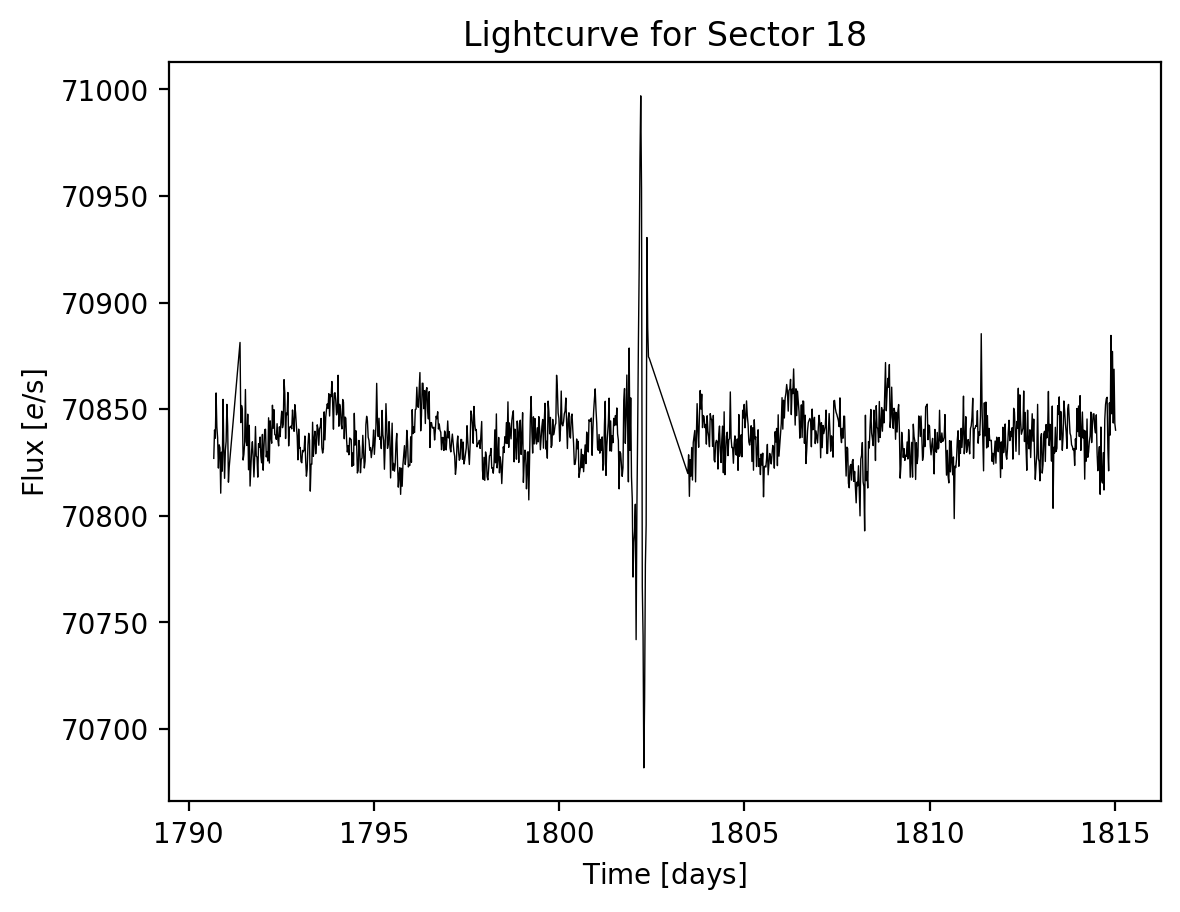

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Lightcurve for Sector 18'}, xlabel='Time $\\rm [days]$', ylabel='Flux $[e / {\\rm s}]$'>)

In [5]:
lc.plot()

Now lets plot the periodogram

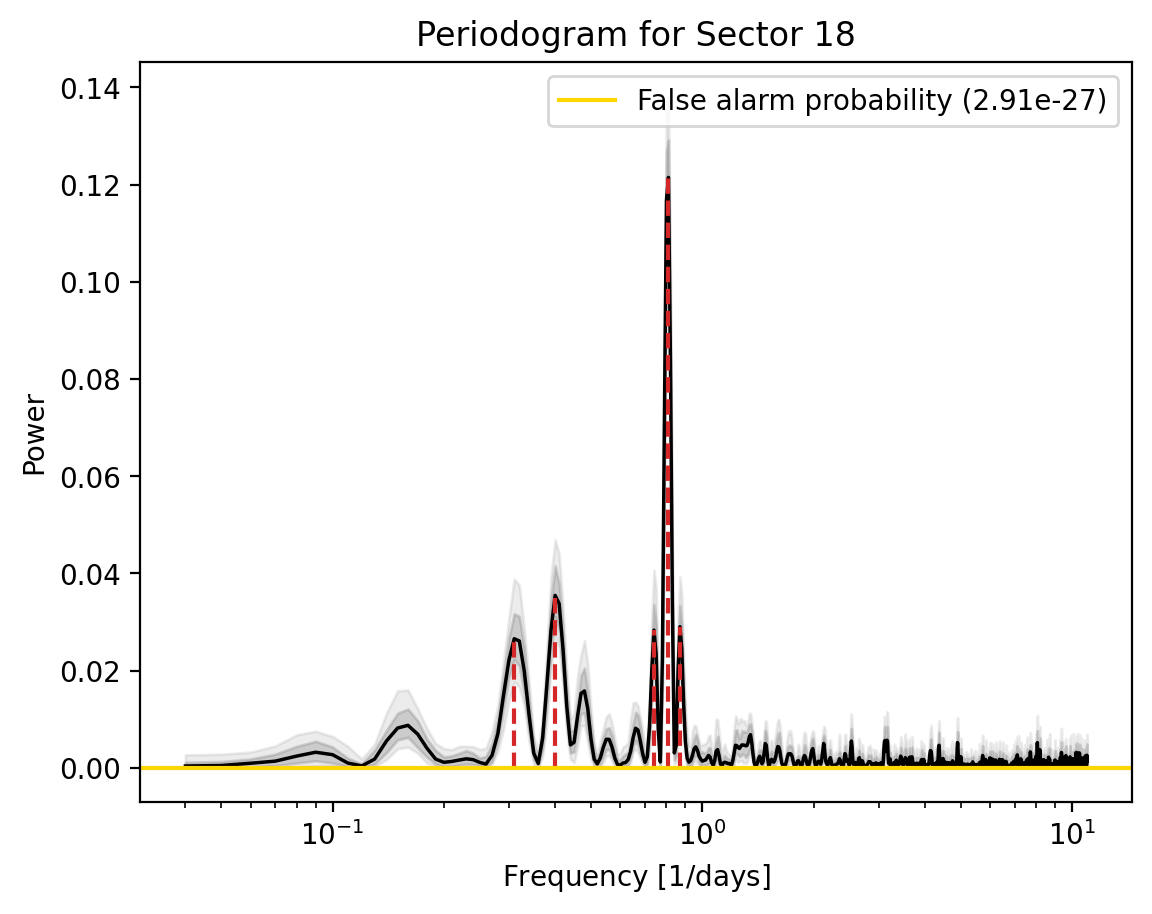

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Periodogram for Sector 18'}, xlabel='Frequency $[1 / {\\rm days}]$', ylabel='Power'>)

In [6]:
lc.plot_periodogram()

Ther are 5 peaks in this LSP. What are they?

In [7]:
lc.stats['peak_freqs'][:lc.stats['n_peaks']]

array([0.31, 0.4 , 0.74, 0.81, 0.87])

Now, lets investigate the spacial pixel map for this light curve, and look at which pixels in the aperture contribute powers to each peak.

We can do this by using the `lc.diagnose_lc_periodogram` function. We need to specify a path to put the gif frames, and the gif, and how we want to identify this gif. 

The first index in the return is the gif itself, and the second index is a SIMBAD query for all the sources in the pixels for each peak. 

In [8]:
lc.diagnose_lc_periodogram(output_path='Corrected_LCs/', identifier='NGC 419')[0]

![diagnostic_gif](https://raw.githubusercontent.com/tobin-wainer/elk/b36223a5ad8dcc41b5fb20371ef9511068d5acf1/docs/tutorials/Corrected_LCs/diagnostics/NGC%20419_pixel_power_gif.gif)

In [9]:
simbad_query=lc.diagnose_lc_periodogram(output_path='Corrected_LCs/', identifier='NGC 419')[1]

Lets try and look at the highest peak, the one at 0.81 days

In [10]:
simbad_query[3]

MAIN_ID,RA,DEC,V__vartyp,V__Vmax,V__R_Vmax,V__magtyp,V__UpVmin,V__Vmin,V__R_Vmin,V__UpPeriod,V__period,V__R_period,OTYPE,FLUX_V,peak_freq,peak_lower,peak_upper
,"""h:m:s""","""d:m:s""",,mag,,,,mag,,,day,,,mag,,,
str27,str13,str13,str16,float32,str1,str1,str1,float32,str1,str1,float64,str2,str6,float32,float64,float64,float64
Gaia DR3 509970402263876864,01 34 31.7910,+61 06 23.019,PULS,--,,G,,--,,,1.238034,,PulsV*,--,0.81,0.78,0.83


The peak has a frequency of 0.81 days, and there is a pulsating variable at that location corresponding to that peak with a period of 1.23 days$^{-1}$. Lets remember that frequency = 1/period, and 1/1.23 = 0.81, so it is very likely that this pulsating variable is the cause of the peak in the LSP

In [11]:
1/1.23

0.8130081300813008